<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abdul Moiz Arsalan**

### **B22F1086AI072**

### **Lab Instructor: Mam Ammara Irfan**

### **Course Instructor: Dr Arshad Iqbal**

### **Import Libraries**

In [17]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

import numpy as np
import matplotlib.pyplot as plt

### **Load Dataset**

In [19]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize images (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

This code initializes an ImageDataGenerator for real-time data augmentation, applying transformations like rotation, shifting, and flipping to improve model generalization. The fit(x_train) function computes statistics (e.g., mean, std) for normalization when using featurewise_center or featurewise_std_normalization. This helps prevent overfitting by generating diverse training samples.










In [20]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

### **Building Classification Model**

This function builds a classification model using a pre-trained base model (e.g., VGG16 or DenseNet121). It freezes the base model's layers to retain learned features and adds a Global Average Pooling layer to reduce dimensions. A fully connected layer with 256 neurons and ReLU activation is added, followed by a dropout layer to prevent overfitting. Finally, a softmax layer is used to classify images into 10 categories, and the model is defined with the base model's input and the new output layer.










In [24]:
def build_model(base_model):
    base_model.trainable = False  # Freeze base model layers

    # Ensure we use base_model output tensor
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Reduce dimensions
    x = Dense(256, activation='relu')(x)  # Fully connected layer
    x = Dropout(0.5)(x)  # Dropout to prevent overfitting
    output_layer = Dense(10, activation='softmax')(x)  # Adjust number of classes

    model = Model(inputs=base_model.input, outputs=output_layer)  # Correctly define the model
    return model

This code loads the pre-trained VGG-16 and DenseNet-121 models without their top layers and sets the input size to (32, 32, 3). It then builds custom classification models on top of them using the build_model function. Both models are compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric. The models are trained using an augmented dataset (datagen.flow), running for 5 epochs with a batch size of 64. Finally, the training history is stored for both models, including validation performance on the test set.

In [26]:
# Load VGG-16 Model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model = build_model(vgg_base)
vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load DenseNet-121 Model
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
densenet_model = build_model(densenet_base)
densenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
history_vgg = vgg_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=5, validation_data=(x_test, y_test))
history_densenet = densenet_model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 740s 945ms/step - accuracy: 0.2249 - loss: 2.1507 - val_accuracy: 0.4504 - val_loss: 1.6303
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 758s 969ms/step - accuracy: 0.3995 - loss: 1.7029 - val_accuracy: 0.4847 - val_loss: 1.4957
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 758s 970ms/step - accuracy: 0.4357 - loss: 1.5970 - val_accuracy: 0.5101 - val_loss: 1.4243
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 758s 969ms/step - accuracy: 0.4618 - loss: 1.5342 - val_accuracy: 0.5183 - val_loss: 1.3838
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 732s 936ms/step - accuracy: 0.4844 - loss: 1.4838 - val_accuracy: 0.5278 - val_loss: 1.3499
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 266s 317ms/step - accuracy: 0.2548 - loss: 2.2352 - val_accuracy: 0.5129 - val_loss: 1.4138
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 254s 307ms/step - accuracy: 0.4372 - loss: 1.5855 - val_accuracy: 0.5594 - val_loss: 1.2852
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 239s 305ms/step - accuracy: 0.4884 - loss: 1

In [28]:
# Evaluate performance
vgg_loss, vgg_acc = vgg_model.evaluate(x_test, y_test)
densenet_loss, densenet_acc = densenet_model.evaluate(x_test, y_test)

print(f'VGG-16 Accuracy: {vgg_acc * 100:.2f}%')
print(f'DenseNet-121 Accuracy: {densenet_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step - accuracy: 0.5258 - loss: 1.3494
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.6083 - loss: 1.1371
VGG-16 Accuracy: 52.78%
DenseNet-121 Accuracy: 60.27%


This code evaluates both trained models on the test dataset, calculating loss and accuracy. It then prints the accuracy of VGG-16 and DenseNet-121 as percentages.

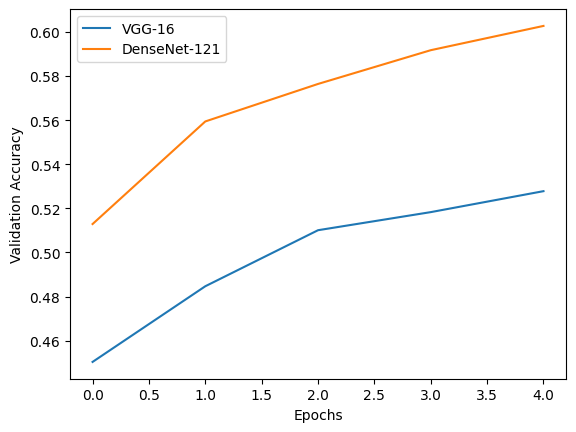

In [29]:
# Plot accuracy comparison
plt.plot(history_vgg.history['val_accuracy'], label='VGG-16')
plt.plot(history_densenet.history['val_accuracy'], label='DenseNet-121')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()